# MODEL 3: MATH SCORES CLASSIFICATION WITHOUT MIDTERM SCORES

# PART A: DATA LOADING, SETUP, TRANSFORMATION

In [1]:
import pandas as pd
import numpy as np
import matplotlib
#import seaborn as sns 
from matplotlib import pylab as plt
from sklearn.model_selection import train_test_split,KFold
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from pandas import DataFrame
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.metrics import precision_score, recall_score, accuracy_score, fbeta_score
from sklearn.datasets import make_regression
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors
from sklearn.datasets import make_moons
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import (NeighborhoodComponentsAnalysis,KNeighborsClassifier)
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.datasets import make_moons
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.colors import ListedColormap
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import mean_squared_error
from pandas import DataFrame
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split 
from  sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, accuracy_score, fbeta_score
from sklearn.linear_model import ElasticNet
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

## 1a. DATA TRANSFORMATION

In [2]:
# initiate path and load data
path_to_data = "/Users/anniephan/Desktop/Data_Science_Master/DATA_1030/data1030_project/data/student"
df = pd.read_csv(path_to_data+'/student-mat.csv', sep=";")
print("number of points and features in the data", df.shape)
df.head(5)

number of points and features in the data (395, 33)


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [8]:
# convert final_score to categorical variable # Good:15~20 Fair:10~14 Poor:0~9
df['pass_fail'] = 'na'
df.loc[(df.G3 >= 10), 'pass_fail'] = 'pass' 
df.loc[(df.G3 < 10), 'pass_fail'] = 'fail' 
df.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,pass_fail
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,fail
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,fail
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,pass
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,pass
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,pass


In [9]:
# drop final score and all midterm score columns because we don't use it
df.drop(columns=['G1', 'G2', 'G3'], inplace=True)
df.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,pass_fail
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,fail
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,fail
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,pass
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,pass
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,pass


## 1b. SEPARATE FEATURE AND TARGET VARIABLE

In [10]:
# separate feature and target variable
label = 'pass_fail'
y = LabelEncoder().fit_transform(df[label])
df.drop(columns=[label],inplace=True)
X = df
ftr_names = X.columns
print(X.head())
print(y)

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  higher internet  romantic  famrel  freetime goout Dalc Walc health absences  
0    yes       no        no       4         3     4    1    1      3        6  
1    yes      yes        no       5         3     3    1    1      3        4  
2    yes      yes        no       4         3     2    2    3      3       10  
3    yes      yes       yes       3         2     2    1    1      5        2  
4    yes       no        no       4         3     2    1    2      5        4  

[5 rows x 30 columns]
[0 0 1 1 1

## 1c. CHECK BALANCE

In [11]:
classes, counts = np.unique(y,return_counts=True)
print('balance:',np.max(counts/len(y)))

balance: 0.6708860759493671


# PART B: MACHINE LEARNING MODELS & PIPELINE

# 1. Logistic Regression

## 1a. HYPERPARAMETER TUNING

In [13]:
def ML_pipeline_kfold_GridSearchCV_logreg(X,y,random_state,n_folds):
    # create a test set
    X_other, X_test, y_other, y_test = train_test_split(X, y, test_size=0.2, random_state = random_state)
    
    # KFold splitter for _other
    kf = KFold(n_splits=n_folds,shuffle=True,random_state=random_state)
    
    # encoders and preprocessors
    onehot_ftrs = ['school','sex','address','Pstatus','famsize','schoolsup','famsup','paid','activities','nursery',
                    'Mjob', 'Fjob','reason', 'guardian', 'higher', 'internet', 'romantic']
    minmax_ftrs = ['age','absences']
    
    onehot_ftrs_i = [df.columns.get_loc(x) for x in onehot_ftrs]
    minmax_ftrs_i = [df.columns.get_loc(x) for x in minmax_ftrs]

    onehot_transformer = Pipeline(steps=[('onehot', OneHotEncoder(sparse=False))])
    minmax_transformer = Pipeline(steps=[('scaler', MinMaxScaler())])
    
    # collect all the encoders
    preprocessor = ColumnTransformer(
        transformers=[
            ('onehot', onehot_transformer, onehot_ftrs_i),
            ('minmax', minmax_transformer, minmax_ftrs_i)])
    
    # make ML pipeline
    pipe = make_pipeline(preprocessor, LogisticRegression(penalty='l1', solver='saga', max_iter=10000, random_state = 20))

    # the parameter(s) we want to tune
    param_grid = {'logisticregression__C': np.logspace(-2,2, num=8)} 
    # prepare gridsearch
    grid = GridSearchCV(pipe, param_grid=param_grid,scoring = make_scorer(accuracy_score),
                        cv=kf, return_train_score = True,n_jobs=-1)
    # do kfold CV on _other
    grid.fit(X_other, y_other)
    
    # get feature names
    feature_names = minmax_ftrs + \
                list(grid.best_estimator_[0].named_transformers_['onehot'][0].get_feature_names(onehot_ftrs))
    
    return grid, grid.score(X_test, y_test), np.array(feature_names), X_test, y_test

In [14]:
import pickle
test_scores = []

for i in range(10):
    print('random state '+str(i+1)) 
    grid, test_score, feature_names, X_test, y_test = ML_pipeline_kfold_GridSearchCV_logreg(X,y,i*42, 5)
    print(grid.best_params_)
    print(i)
    print('best CV score:',grid.best_score_)
    print('test score:',test_score)
    
    # save the output so I can use it later
    fname = '../results/noG1G2math/logreg/noG1G2math_logreg_pipeline'+str(i)+'.save'
    file = open(fname, 'wb')
    pickle.dump((grid, X_test,y_test), file)
    file.close()
    
    test_scores.append(test_score)

mean_test_scores = np.around(np.mean(test_scores),3)
std_test_scores = np.around(np.std(test_scores),3)
print('test accuracy:',mean_test_scores ,'+/-',std_test_scores)

# store mean and std of model's accuracy test score
model_mean = []
model_std = []
model_mean.append(mean_test_scores)
model_std.append(std_test_scores)
print(model_mean)
print(model_std)

# save the output so I can use it later
fname = '../results/noG1G2math/logreg/noG1G2math_logreg_model_mean_std'+'.save'
file = open(fname, 'wb')
pickle.dump((mean_test_scores, std_test_scores, model_mean, model_std), file)
file.close()

random state 1
{'logisticregression__C': 0.01}
0
best CV score: 0.6834325396825397
test score: 0.620253164556962
random state 2
{'logisticregression__C': 0.517947467923121}
1
best CV score: 0.6774801587301588
test score: 0.6329113924050633
random state 3
{'logisticregression__C': 1.9306977288832496}
2
best CV score: 0.6677579365079366
test score: 0.6329113924050633
random state 4
{'logisticregression__C': 0.01}
3
best CV score: 0.6774801587301588
test score: 0.6455696202531646
random state 5
{'logisticregression__C': 0.01}
4
best CV score: 0.6487103174603175
test score: 0.759493670886076
random state 6
{'logisticregression__C': 0.01}
5
best CV score: 0.6643849206349206
test score: 0.6962025316455697
random state 7
{'logisticregression__C': 0.01}
6
best CV score: 0.6614087301587301
test score: 0.7088607594936709
random state 8
{'logisticregression__C': 0.01}
7
best CV score: 0.7024305555555556
test score: 0.5443037974683544
random state 9
{'logisticregression__C': 0.01}
8
best CV score:

In [15]:
# run pipeline on the best iteration
grid, test_score, feature_names, X_test, y_test= ML_pipeline_kfold_GridSearchCV_logreg(X,y,4*42,5)
print(grid.best_score_)
print(grid.score(X_test,y_test))
print(grid.best_params_)

# save best params of model
best_params = []
best_params.append(grid.best_params_)
print("best params for ML models:", best_params)

0.6487103174603175
0.759493670886076
{'logisticregression__C': 0.01}
best params for ML models: [{'logisticregression__C': 0.01}]


In [16]:
# save the output so I can use it later
fname = '../results/noG1G2math/logreg/noG1G2math_logreg_bestmodel_score'+'.save'
file = open(fname, 'wb')
pickle.dump((grid, X_test,y_test), file)
file.close()

## 1b. FEATURE IMPORTANCE

## 1bi. PERTURBATION

In [272]:
# load saved data
for i in range(10):
    import pickle
    fname = '../results/noG1G2math/logreg/noG1G2math_logreg_pipeline'+str(i)+'.save'
    file = open(fname, 'rb')
    grid, X_test, y_test = pickle.load(file)
    file.close()

In [273]:
np.random.seed(42) #fixed random state in numpy
nr_runs = 10
scores = np.zeros([len(ftr_names),nr_runs])

print('test score = ', mean_test_scores)
print('test baseline = ',np.sum(y == 1)/len(y))
# loop through the features
for i in range(len(ftr_names)):
    print('shuffling '+str(ftr_names[i]))
    acc_scores = []
    for j in range(nr_runs):
        X_test_shuffled = X_test.copy()
        X_test_shuffled[ftr_names[i]] = np.random.permutation(X_test[ftr_names[i]].values)
        acc_scores.append(grid.score(X_test_shuffled,y_test))
    print('   shuffled test score:',np.around(np.mean(acc_scores),3),'+/-',np.around(np.std(acc_scores),3))
    scores[i] = acc_scores

test score =  0.675
test baseline =  0.6708860759493671
shuffling school
   shuffled test score: 0.734 +/- 0.0
shuffling sex
   shuffled test score: 0.734 +/- 0.0
shuffling age
   shuffled test score: 0.734 +/- 0.0
shuffling address
   shuffled test score: 0.734 +/- 0.0
shuffling famsize
   shuffled test score: 0.734 +/- 0.0
shuffling Pstatus
   shuffled test score: 0.734 +/- 0.0
shuffling Medu
   shuffled test score: 0.734 +/- 0.0
shuffling Fedu
   shuffled test score: 0.734 +/- 0.0
shuffling Mjob
   shuffled test score: 0.734 +/- 0.0
shuffling Fjob
   shuffled test score: 0.734 +/- 0.0
shuffling reason
   shuffled test score: 0.734 +/- 0.0
shuffling guardian
   shuffled test score: 0.734 +/- 0.0
shuffling traveltime
   shuffled test score: 0.734 +/- 0.0
shuffling studytime
   shuffled test score: 0.734 +/- 0.0
shuffling failures
   shuffled test score: 0.734 +/- 0.0
shuffling schoolsup
   shuffled test score: 0.734 +/- 0.0
shuffling famsup
   shuffled test score: 0.734 +/- 0.0
shuffl

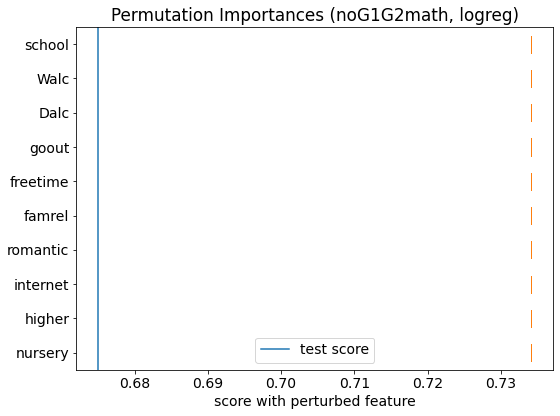

In [274]:
sorted_indcs = np.argsort(np.mean(scores,axis=1))[:10][::-1] #order features by how important they are - by how much accuracy score has reduced 
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(8,6))
plt.boxplot(scores[sorted_indcs].T,labels=ftr_names[sorted_indcs],vert=False)
plt.axvline(mean_test_scores,label='test score') #original test score
plt.title("Permutation Importances (noG1G2math, logreg)")
plt.xlabel('score with perturbed feature')
plt.legend()
plt.tight_layout()
path = '/Users/anniephan/Desktop/Data_Science_Master/DATA_1030/data1030_project/figures/noG1G2math/logreg/'
plt.savefig(path + 'logreg_perturb.png')
plt.show()

## 1bii. COEFFICIENTS

In [17]:
def ML_pipeline_kfold_GridSearchCV_logreg_ftimp(X,y,random_state,n_folds):
    # create a test set
    X_other, X_test, y_other, y_test = train_test_split(X, y, test_size=0.2, random_state = random_state)
    
    # StratifiedKFold
    kf = StratifiedKFold(n_splits=n_folds,shuffle=True,random_state=random_state)
    
    # encoders and preprocessors
    onehot_ftrs = ['school','sex','address','Pstatus','famsize','schoolsup','famsup','paid','activities','nursery',
                    'Mjob', 'Fjob','reason', 'guardian', 'higher', 'internet', 'romantic']
    minmax_ftrs = ['age','absences']
    
    onehot_ftrs_i = [df.columns.get_loc(x) for x in onehot_ftrs]
    minmax_ftrs_i = [df.columns.get_loc(x) for x in minmax_ftrs]

    onehot_transformer = Pipeline(steps=[('onehot', OneHotEncoder(sparse=False))])
    minmax_transformer = Pipeline(steps=[('scaler', MinMaxScaler())])
    
    # collect all the encoders
    preprocessor = ColumnTransformer(
        transformers=[
            ('onehot', onehot_transformer, onehot_ftrs_i),
            ('minmax', minmax_transformer, minmax_ftrs_i)])
    
    # Standard Scaler to standardized
    final_scaler = StandardScaler()
    
    pipe = make_pipeline(preprocessor, final_scaler, LogisticRegression(penalty='l1', solver='saga', max_iter=10000, random_state = 20))

    # the parameter(s) we want to tune
    param_grid = {'logisticregression__C': np.logspace(-2,2, num=8)} 
    # prepare gridsearch
    grid = GridSearchCV(pipe, param_grid=param_grid,scoring = make_scorer(accuracy_score),
                        cv=kf, return_train_score = True,n_jobs=-1)
    # do kfold CV on _other
    grid.fit(X_other, y_other)
    
    #get feature names
    feature_names = minmax_ftrs + \
                list(grid.best_estimator_[0].named_transformers_['onehot'][0].get_feature_names(onehot_ftrs))
    
    return grid, grid.score(X_test, y_test), np.array(feature_names), X_test, y_test

In [18]:
grid, test_score, feature_names, X_test, y_test = ML_pipeline_kfold_GridSearchCV_logreg_ftimp(X,y,42, 5)
print(grid.best_score_)
print(grid.score(X_test,y_test))
print(grid.best_params_)

0.6994543650793651
0.620253164556962
{'logisticregression__C': 0.13894954943731375}


In [19]:
# save the output so I can use it later
fname = '../results/noG1G2math/logreg/noG1G2math_logreg_coeff'+'.save'
file = open(fname, 'wb')
pickle.dump((grid, X_test,y_test), file)
file.close()

In [20]:
#load saved data
import pickle
fname = '../results/noG1G2math/logreg/noG1G2math_logreg_coeff'+'.save'
file = open(fname, 'rb')
grid, X_test, y_test = pickle.load(file)
file.close()

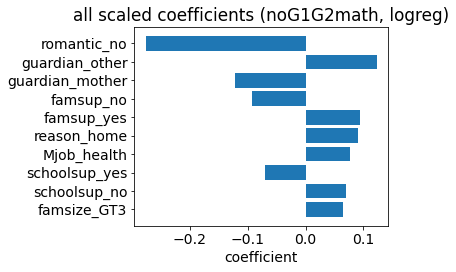

In [21]:
coefs = grid.best_estimator_[-1].coef_[0]
sorted_indcs = np.argsort(np.abs(coefs))

plt.rcParams.update({'font.size': 14})
plt.barh(np.arange(10),coefs[sorted_indcs[-10:]])
plt.yticks(np.arange(10),feature_names[sorted_indcs[-10:]])
plt.xlabel('coefficient')
plt.title('all scaled coefficients (noG1G2math, logreg)')
plt.tight_layout()
path = '/Users/anniephan/Desktop/Data_Science_Master/DATA_1030/data1030_project/figures/noG1G2math/logreg/'
plt.savefig(path + 'logreg_coeff.png',bbox_inches='tight')
plt.show()

## 1biii. SHAP

In [22]:
# load saved data
import pickle
fname = '../results/noG1G2math/logreg/noG1G2math_logreg_bestmodel_score'+'.save'
file = open(fname, 'rb')
grid, X_test, y_test = pickle.load(file)
file.close()

In [23]:
import shap
shap.initjs() # required for visualizations later on
# transform the test set
X_test_transformed = grid.best_estimator_[0].transform(X_test)
print(np.shape(X_test_transformed))
# create explainer
explainer = shap.LinearExplainer(grid.best_estimator_[1], X_test_transformed)
# calculate shap values
shap_values = explainer.shap_values(X_test_transformed)
print(np.shape(shap_values))

(79, 45)
(79, 45)


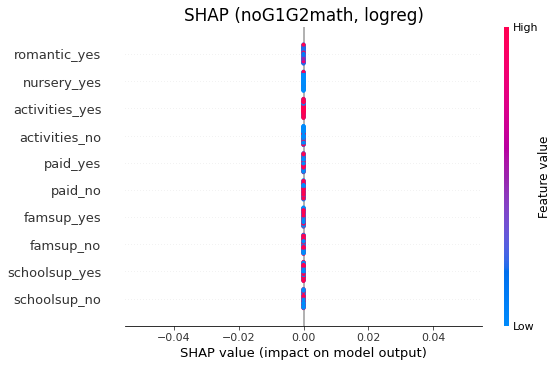

In [24]:
shap.summary_plot(shap_values, X_test_transformed, feature_names=feature_names, max_display=10, show=False)
plt.title("SHAP (noG1G2math, logreg)")
path = '/Users/anniephan/Desktop/Data_Science_Master/DATA_1030/data1030_project/figures/noG1G2math/logreg/'
plt.savefig(path + 'logreg_shap.png',bbox_inches='tight')
plt.show()

In [205]:
ind = 0
print(explainer.expected_value)
shap.force_plot(
    explainer.expected_value, shap_values[ind,:], X_test_transformed[ind,:],
    feature_names=feature_names
)

0.6178918302317066


In [206]:
ind = 25
print(explainer.expected_value)
shap.force_plot(
    explainer.expected_value, shap_values[ind,:], X_test_transformed[ind,:],
    feature_names=feature_names
)

0.6178918302317066


In [207]:
ind = 50
print(explainer.expected_value)
shap.force_plot(
    explainer.expected_value, shap_values[ind,:], X_test_transformed[ind,:],
    feature_names=feature_names
)

0.6178918302317066


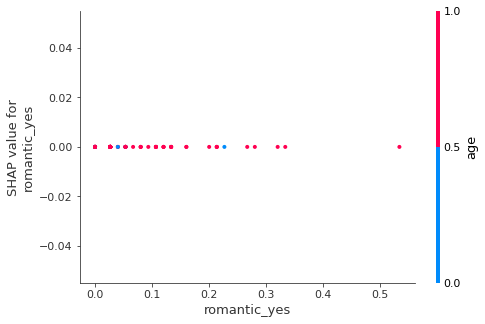

In [208]:
ftr = 'romantic_yes'
shap.dependence_plot(ftr, shap_values, X_test_transformed, feature_names=feature_names)

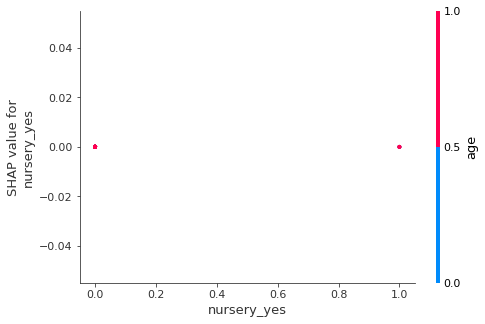

In [209]:
ftr = 'nursery_yes'
shap.dependence_plot(ftr, shap_values, X_test_transformed, feature_names=feature_names)

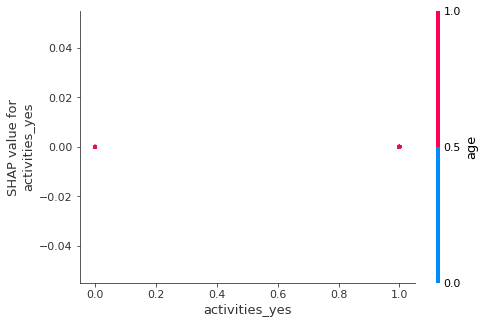

In [210]:
ftr = 'activities_yes'
shap.dependence_plot(ftr, shap_values, X_test_transformed, feature_names=feature_names)

## 1c. CONFUSION MATRIX

In [211]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = np.array(classes)
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [212]:
# load saved data
import pickle
fname = '../results/noG1G2math/logreg/noG1G2math_logreg_bestmodel_score'+'.save'
file = open(fname, 'rb')
grid, X_test, y_test = pickle.load(file)
file.close()

confusion matrix : [[ 0 19]
 [ 0 60]]


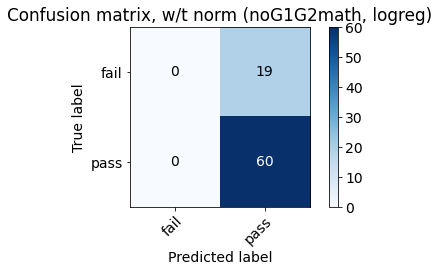

normalized confusion matrix : [[0. 1.]
 [0. 1.]]


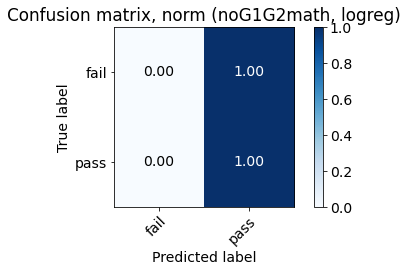

In [213]:
y_pred = grid.best_estimator_.predict(X_test)
#not-normalized
conf_mat = confusion_matrix(y_test, y_pred)
print("confusion matrix :", conf_mat)
plot_confusion_matrix(y_test,y_pred,classes=['fail','pass'])
plt.title('Confusion matrix, w/t norm (noG1G2math, logreg)')
path = '/Users/anniephan/Desktop/Data_Science_Master/DATA_1030/data1030_project/figures/noG1G2math/logreg/'
plt.savefig(path + 'logreg_cm.png')
plt.show()

#normalized
norm_conf_mat = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]
print("normalized confusion matrix :",norm_conf_mat)
plot_confusion_matrix(y_test,y_pred,classes=['fail','pass'],normalize= True )
plt.title('Confusion matrix, norm (noG1G2math, logreg)')
path = '/Users/anniephan/Desktop/Data_Science_Master/DATA_1030/data1030_project/figures/noG1G2math/logreg/'
plt.savefig(path + 'logreg_cmnorm.png')
plt.show()

# 2. RANDOM FOREST CLASSIFIER

## 2a. HYPERPARAMETER TUNING

In [25]:
def ML_pipeline_kfold_GridSearchCV_rf(X,y,random_state,n_folds):
    # create a test set
    X_other, X_test, y_other, y_test = train_test_split(X, y, test_size=0.2, random_state = random_state)
    
    # KFold splitter for _other
    kf = KFold(n_splits=n_folds,shuffle=True,random_state=random_state)
    
    #encoders and preprocessors
    onehot_ftrs = ['school','sex','address','Pstatus','famsize','schoolsup','famsup','paid','activities','nursery',
                    'Mjob', 'Fjob','reason', 'guardian', 'higher', 'internet', 'romantic']
    minmax_ftrs = ['age','absences']
    
    onehot_ftrs_i = [df.columns.get_loc(x) for x in onehot_ftrs]
    minmax_ftrs_i = [df.columns.get_loc(x) for x in minmax_ftrs]

    onehot_transformer = Pipeline(steps=[('onehot', OneHotEncoder(sparse=False))])
    minmax_transformer = Pipeline(steps=[('scaler', MinMaxScaler())])
    
    # collect all the encoders
    preprocessor = ColumnTransformer(
        transformers=[
            ('onehot', onehot_transformer, onehot_ftrs_i),
            ('minmax', minmax_transformer, minmax_ftrs_i)])
    
    # make ML pipeline
    pipe = make_pipeline(preprocessor, RandomForestClassifier(n_estimators = 200,random_state=random_state))

    # the parameter(s) we want to tune
    param_grid = {'randomforestclassifier__max_depth': range(1,40,5),
                  'randomforestclassifier__min_samples_split': range(2,20,5),
                 'randomforestclassifier__max_features': [0.5,0.75,1.0]} 
    
    # prepare gridsearch
    grid = GridSearchCV(pipe, param_grid=param_grid,scoring = make_scorer(accuracy_score),
                        cv=kf, return_train_score = True,n_jobs=-1)
    # do kfold CV on _other
    grid.fit(X_other, y_other)
    
    #get feature names
    feature_names = minmax_ftrs + \
                list(grid.best_estimator_[0].named_transformers_['onehot'][0].get_feature_names(onehot_ftrs))
    
    return grid, grid.score(X_test, y_test), np.array(feature_names), X_test, y_test

In [26]:
import pickle
test_scores = []

for i in range(10):
    print('random state '+str(i+1)) 
    grid, test_score, feature_names, X_test, y_test = ML_pipeline_kfold_GridSearchCV_rf(X,y,i*42, 5)
    print(grid.best_params_)
    print(i)
    print('best CV score:',grid.best_score_)
    print('test score:',test_score)
    
    # save the output so I can use it later
    fname = '../results/noG1G2math/rf/noG1G2math_rf_pipeline'+str(i)+'.save'
    file = open(fname, 'wb')
    pickle.dump((grid, X_test,y_test), file)
    file.close()
    
    test_scores.append(test_score)

mean_test_scores = np.around(np.mean(test_scores),3)
std_test_scores = np.around(np.std(test_scores),3)
print('test accuracy:',mean_test_scores ,'+/-',std_test_scores)

# store mean and std of model's accuracy test score
model_mean.append(mean_test_scores)
model_std.append(std_test_scores)
print(model_mean)
print(model_std)

# save the output so I can use it later
fname = '../results/noG1G2math/rf/noG1G2math_rf_model_mean_std'+'.save'
file = open(fname, 'wb')
pickle.dump((mean_test_scores, std_test_scores, model_mean, model_std), file)
file.close()

random state 1
{'randomforestclassifier__max_depth': 6, 'randomforestclassifier__max_features': 0.75, 'randomforestclassifier__min_samples_split': 12}
0
best CV score: 0.6833829365079366
test score: 0.6582278481012658
random state 2
{'randomforestclassifier__max_depth': 1, 'randomforestclassifier__max_features': 0.5, 'randomforestclassifier__min_samples_split': 2}
1
best CV score: 0.6838789682539682
test score: 0.6455696202531646
random state 3
{'randomforestclassifier__max_depth': 1, 'randomforestclassifier__max_features': 0.5, 'randomforestclassifier__min_samples_split': 2}
2
best CV score: 0.661359126984127
test score: 0.6835443037974683
random state 4
{'randomforestclassifier__max_depth': 6, 'randomforestclassifier__max_features': 0.5, 'randomforestclassifier__min_samples_split': 2}
3
best CV score: 0.6837301587301587
test score: 0.6708860759493671
random state 5
{'randomforestclassifier__max_depth': 6, 'randomforestclassifier__max_features': 1.0, 'randomforestclassifier__min_sampl

In [27]:
# run pipeline on the best iteration
grid, test_score, feature_names, X_test, y_test= ML_pipeline_kfold_GridSearchCV_rf(X,y,6*42,5)
print(grid.best_score_)
print(grid.score(X_test,y_test))
print(grid.best_params_)

# save best params of model
best_params.append(grid.best_params_)
print("best params for ML models:", best_params)

0.6708829365079365
0.759493670886076
{'randomforestclassifier__max_depth': 11, 'randomforestclassifier__max_features': 0.5, 'randomforestclassifier__min_samples_split': 2}
best params for ML models: [{'logisticregression__C': 0.01}, {'randomforestclassifier__max_depth': 11, 'randomforestclassifier__max_features': 0.5, 'randomforestclassifier__min_samples_split': 2}]


In [28]:
# save the output so I can use it later
fname = '../results/noG1G2math/rf/noG1G2math_rf_bestmodel_score'+'.save'
file = open(fname, 'wb')
pickle.dump((grid, X_test,y_test), file)
file.close()

## 2b. FEATURE IMPORTANCE

## 2bi. PERTURBATION

In [218]:
# load saved data
for i in range(10):
    import pickle
    fname = '../results/noG1G2math/rf/noG1G2math_rf_pipeline'+str(i)+'.save'
    file = open(fname, 'rb')
    grid, X_test, y_test = pickle.load(file)
    file.close()

In [219]:
np.random.seed(42) #fixed random state in numpy
nr_runs = 10
scores = np.zeros([len(ftr_names),nr_runs])

print('test score = ', model_mean[1])
print('test baseline = ',np.sum(y == 1)/len(y))
# loop through the features
for i in range(len(ftr_names)):
    print('shuffling '+str(ftr_names[i]))
    acc_scores = []
    for j in range(nr_runs):
        X_test_shuffled = X_test.copy()
        X_test_shuffled[ftr_names[i]] = np.random.permutation(X_test[ftr_names[i]].values)
        acc_scores.append(grid.score(X_test_shuffled,y_test))
    print('   shuffled test score:',np.around(np.mean(acc_scores),3),'+/-',np.around(np.std(acc_scores),3))
    scores[i] = acc_scores

test score =  0.675
test baseline =  0.6708860759493671
shuffling school
   shuffled test score: 0.635 +/- 0.005
shuffling sex
   shuffled test score: 0.638 +/- 0.006
shuffling age
   shuffled test score: 0.654 +/- 0.03
shuffling address
   shuffled test score: 0.638 +/- 0.008
shuffling famsize
   shuffled test score: 0.647 +/- 0.009
shuffling Pstatus
   shuffled test score: 0.651 +/- 0.01
shuffling Medu
   shuffled test score: 0.633 +/- 0.0
shuffling Fedu
   shuffled test score: 0.633 +/- 0.0
shuffling Mjob
   shuffled test score: 0.665 +/- 0.018
shuffling Fjob
   shuffled test score: 0.661 +/- 0.017
shuffling reason
   shuffled test score: 0.635 +/- 0.023
shuffling guardian
   shuffled test score: 0.622 +/- 0.014
shuffling traveltime
   shuffled test score: 0.633 +/- 0.0
shuffling studytime
   shuffled test score: 0.633 +/- 0.0
shuffling failures
   shuffled test score: 0.633 +/- 0.0
shuffling schoolsup
   shuffled test score: 0.622 +/- 0.012
shuffling famsup
   shuffled test score: 

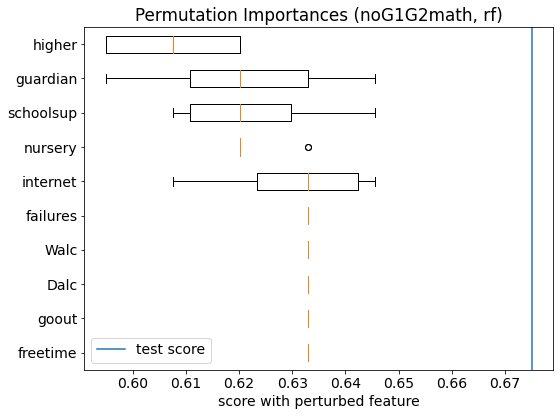

In [220]:
sorted_indcs = np.argsort(np.mean(scores,axis=1))[:10][::-1] #order features by how important they are - by how much accuracy score has reduced 
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(8,6))
plt.boxplot(scores[sorted_indcs].T,labels=ftr_names[sorted_indcs],vert=False)
plt.axvline(mean_test_scores,label='test score') #original test score
plt.title("Permutation Importances (noG1G2math, rf)")
plt.xlabel('score with perturbed feature')
plt.legend()
plt.tight_layout()
path = '/Users/anniephan/Desktop/Data_Science_Master/DATA_1030/data1030_project/figures/noG1G2math/rf/'
plt.savefig(path + 'rf_perturb.png')
plt.show()

## 2bii. DECISION TREE-NATIVE FEATURE IMPORTANCES METRICS

In [31]:
grid, test_score, feature_names, X_test, y_test = ML_pipeline_kfold_GridSearchCV_rf(X,y,42, 5)
print(grid.best_score_)
print(grid.score(X_test,y_test))
print(grid.best_params_)

0.6838789682539682
0.6455696202531646
{'randomforestclassifier__max_depth': 1, 'randomforestclassifier__max_features': 0.5, 'randomforestclassifier__min_samples_split': 2}


In [32]:
# save the output so I can use it later
fname = '../results/noG1G2math/rf/noG1G2math_rf_dtft'+'.save'
file = open(fname, 'wb')
pickle.dump((grid, X_test,y_test), file)
file.close()

In [33]:
# load saved data
import pickle
fname = '../results/noG1G2math/rf/noG1G2math_rf_dtft'+'.save'
file = open(fname, 'rb')
grid, X_test, y_test = pickle.load(file)
file.close()

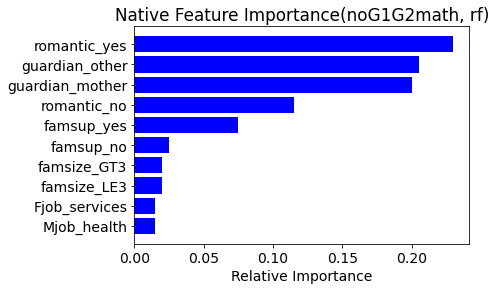

In [34]:
importances = grid.best_estimator_[1].feature_importances_
indices = np.argsort(importances)[-10:]
features = feature_names
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.title('Native Feature Importance(noG1G2math, rf)')
path = '/Users/anniephan/Desktop/Data_Science_Master/DATA_1030/data1030_project/figures/noG1G2math/rf/'
plt.savefig(path + 'rf_ftnative.png',bbox_inches='tight')
plt.show()

## 2biii. SHAP

In [35]:
# load saved data
import pickle
fname = '../results/noG1G2math/rf/noG1G2math_rf_bestmodel_score'+'.save'
file = open(fname, 'rb')
grid, X_test, y_test = pickle.load(file)
file.close()

In [36]:
import shap
shap.initjs() # required for visualizations later on
# create the explainer object with the random forest model
explainer = shap.TreeExplainer(grid.best_estimator_[1])
# transform the test set
X_test_transformed = grid.best_estimator_[0].transform(X_test)
print(np.shape(X_test_transformed))
# calculate shap values 
shap_values = explainer.shap_values(X_test_transformed, check_additivity=False)
print(np.shape(shap_values))

(79, 45)
(2, 79, 45)


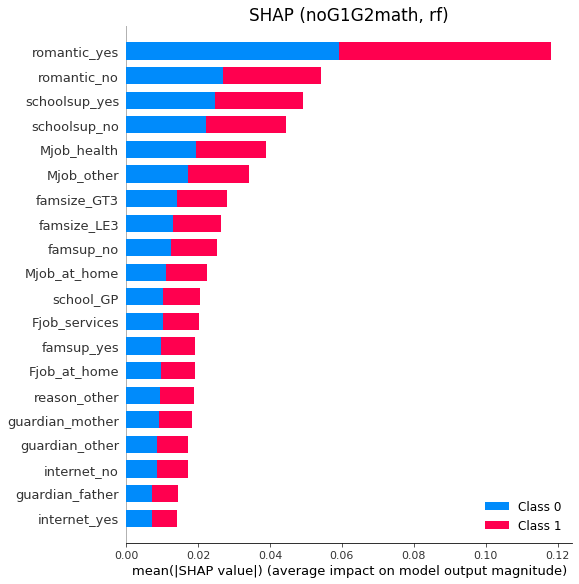

In [37]:
shap.summary_plot(shap_values, X_test_transformed,feature_names = feature_names, show=False)
plt.title("SHAP (noG1G2math, rf)")
path = '/Users/anniephan/Desktop/Data_Science_Master/DATA_1030/data1030_project/figures/noG1G2math/rf/'
plt.savefig(path + 'rf_shap.png',bbox_inches='tight')
plt.show()

In [226]:
index = 0 # the index of the point to explain
print(explainer.expected_value[0]) # we explain class 0 predictions
shap.force_plot(explainer.expected_value[0], shap_values[0][index,:], features = X_test_transformed[index,:],feature_names = feature_names)

0.3375158227848101


In [227]:
index = 25 # the index of the point to explain
print(explainer.expected_value[0]) # we explain class 0 predictions
shap.force_plot(explainer.expected_value[0], shap_values[0][index,:], features = X_test_transformed[index,:],feature_names = feature_names)

0.3375158227848101


In [228]:
index = 50 # the index of the point to explain
print(explainer.expected_value[0]) # we explain class 0 predictions
shap.force_plot(explainer.expected_value[0], shap_values[0][index,:], features = X_test_transformed[index,:],feature_names = feature_names)

0.3375158227848101


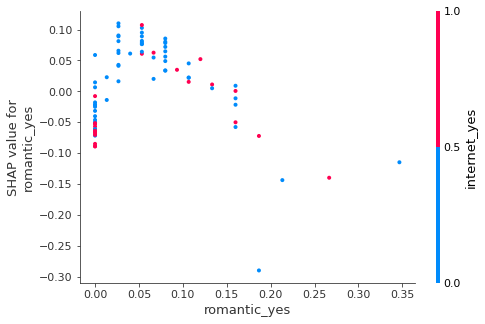

In [229]:
ftr = 'romantic_yes'
shap.dependence_plot(ftr, shap_values[1], X_test_transformed, feature_names=feature_names)

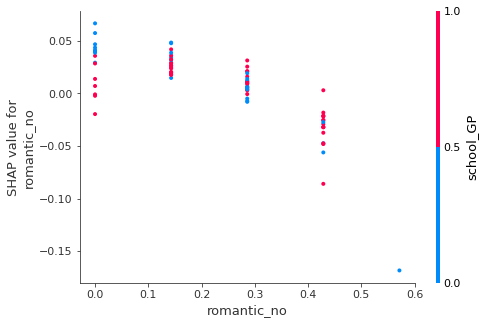

In [230]:
ftr = 'romantic_no'
shap.dependence_plot(ftr, shap_values[1], X_test_transformed, feature_names=feature_names)

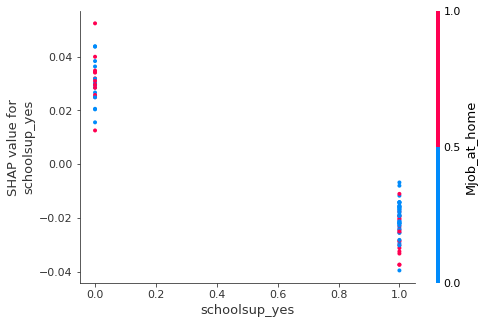

In [231]:
ftr = 'schoolsup_yes'
shap.dependence_plot(ftr, shap_values[1], X_test_transformed, feature_names=feature_names)

## 2c. CONFUSION MATRIX

In [293]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = np.array(classes)
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [294]:
# load saved data
import pickle
fname = '../results/noG1G2math/rf/noG1G2math_rf_bestmodel_score'+'.save'
file = open(fname, 'rb')
grid, X_test, y_test = pickle.load(file)
file.close()

confusion matrix : [[ 6 17]
 [ 2 54]]


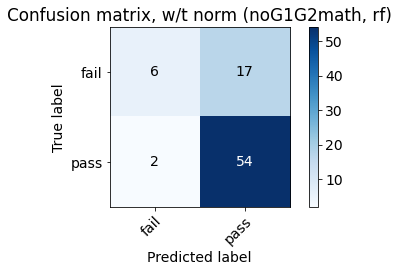

normalized confusion matrix : [[0.26086957 0.73913043]
 [0.03571429 0.96428571]]


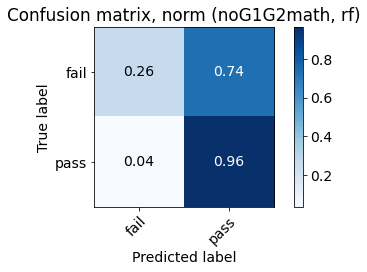

In [295]:
y_pred = grid.best_estimator_.predict(X_test)
# not-normalized
conf_mat = confusion_matrix(y_test, y_pred)
print("confusion matrix :", conf_mat)
plot_confusion_matrix(y_test,y_pred,classes=['fail','pass'])
plt.title('Confusion matrix, w/t norm (noG1G2math, rf)')
path = '/Users/anniephan/Desktop/Data_Science_Master/DATA_1030/data1030_project/figures/noG1G2math/rf/'
plt.savefig(path + 'rf_cm.png')
plt.show()

# normalized
norm_conf_mat = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]
print("normalized confusion matrix :",norm_conf_mat)
plot_confusion_matrix(y_test,y_pred,classes=['fail','pass'],normalize= True )
plt.title('Confusion matrix, norm (noG1G2math, rf)')
path = '/Users/anniephan/Desktop/Data_Science_Master/DATA_1030/data1030_project/figures/noG1G2math/rf/'
plt.savefig(path + 'rf_cmnorm.png')
plt.show()

# 3. SVC

## 3a. HYPERPARAMETER TUNING

In [38]:
def ML_pipeline_kfold_GridSearchCV_svc(X,y,random_state,n_folds):
    # create a test set
    X_other, X_test, y_other, y_test = train_test_split(X, y, test_size=0.2, random_state = random_state)
    
    # KFold splitter for _other
    kf = KFold(n_splits=n_folds,shuffle=True,random_state=random_state)
    
    #encoders and preprocessors
    onehot_ftrs = ['school','sex','address','Pstatus','famsize','schoolsup','famsup','paid','activities','nursery',
                    'Mjob', 'Fjob','reason', 'guardian', 'higher', 'internet', 'romantic']
    minmax_ftrs = ['age','absences']
    
    onehot_ftrs_i = [df.columns.get_loc(x) for x in onehot_ftrs]
    minmax_ftrs_i = [df.columns.get_loc(x) for x in minmax_ftrs]

    onehot_transformer = Pipeline(steps=[('onehot', OneHotEncoder(sparse=False))])
    minmax_transformer = Pipeline(steps=[('minmax', MinMaxScaler())])
    
    # collect all the encoders
    preprocessor = ColumnTransformer(
        transformers=[
            ('onehot', onehot_transformer, onehot_ftrs_i),
            ('minmax', minmax_transformer, minmax_ftrs_i)])
    
    #make pipeline
    pipe = make_pipeline(preprocessor,SVC(random_state = 20))

    # the parameter(s) we want to tune
    param_grid = {'svc__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000],'svc__gamma': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]}
    # prepare gridsearch
    grid = GridSearchCV(pipe, param_grid=param_grid,scoring = make_scorer(accuracy_score),
                        cv=kf, return_train_score = True,n_jobs=-1)
    
    # do kfold CV on _other
    grid.fit(X_other, y_other)
    
    #get feature names
    feature_names = minmax_ftrs + \
                list(grid.best_estimator_[0].named_transformers_['onehot'][0].get_feature_names(onehot_ftrs))
    
    return grid, grid.score(X_test, y_test), np.array(feature_names), X_test, y_test

In [39]:
import pickle
test_scores = []

for i in range(10):
    print('random state '+str(i+1)) 
    grid, test_score, feature_names, X_test, y_test = ML_pipeline_kfold_GridSearchCV_svc(X,y,i*42, 5)
    print(grid.best_params_)
    print(i)
    print('best CV score:',grid.best_score_)
    print('test score:',test_score)
    
    # save the output so I can use it later
    fname = '../results/noG1G2math/svc/noG1G2math_svc_pipeline'+str(i)+'.save'
    file = open(fname, 'wb')
    pickle.dump((grid, X_test,y_test), file)
    file.close()
    
    test_scores.append(test_score)
    
mean_test_scores = np.around(np.mean(test_scores),3)
std_test_scores = np.around(np.std(test_scores),3)
print('test accuracy:',mean_test_scores ,'+/-',std_test_scores)

# store mean and std of model's accuracy test score
model_mean.append(mean_test_scores)
model_std.append(std_test_scores)
print(model_mean)
print(model_std)

# save the output so I can use it later
fname = '../results/noG1G2math/svc/noG1G2math_svc_model_mean_std'+'.save'
file = open(fname, 'wb')
pickle.dump((mean_test_scores, std_test_scores, model_mean, model_std), file)
file.close()

random state 1
{'svc__C': 100, 'svc__gamma': 0.001}
0
best CV score: 0.6866071428571429
test score: 0.6582278481012658
random state 2
{'svc__C': 10, 'svc__gamma': 0.01}
1
best CV score: 0.6997023809523809
test score: 0.6329113924050633
random state 3
{'svc__C': 10, 'svc__gamma': 0.01}
2
best CV score: 0.6675595238095238
test score: 0.6962025316455697
random state 4
{'svc__C': 1, 'svc__gamma': 0.1}
3
best CV score: 0.6806547619047618
test score: 0.6455696202531646
random state 5
{'svc__C': 100, 'svc__gamma': 1}
4
best CV score: 0.6550099206349207
test score: 0.759493670886076
random state 6
{'svc__C': 100, 'svc__gamma': 0.001}
5
best CV score: 0.6802579365079364
test score: 0.6962025316455697
random state 7
{'svc__C': 0.001, 'svc__gamma': 1e-05}
6
best CV score: 0.6614087301587301
test score: 0.7088607594936709
random state 8
{'svc__C': 100, 'svc__gamma': 0.001}
7
best CV score: 0.7086805555555555
test score: 0.5569620253164557
random state 9
{'svc__C': 1, 'svc__gamma': 10}
8
best CV sc

In [40]:
# run pipeline on the best iteration
grid, test_score, feature_names, X_test, y_test= ML_pipeline_kfold_GridSearchCV_svc(X,y,4*42,5)
print(grid.best_score_)
print(grid.score(X_test,y_test))
print(grid.best_params_)

# save best params of model
best_params.append(grid.best_params_)
print("best params for ML models:", best_params)

0.6550099206349207
0.759493670886076
{'svc__C': 100, 'svc__gamma': 1}
best params for ML models: [{'logisticregression__C': 0.01}, {'randomforestclassifier__max_depth': 11, 'randomforestclassifier__max_features': 0.5, 'randomforestclassifier__min_samples_split': 2}, {'svc__C': 100, 'svc__gamma': 1}]


In [41]:
# save the output so I can use it later
fname = '../results/noG1G2math/svc/noG1G2math_svc_bestmodel_score'+'.save'
file = open(fname, 'wb')
pickle.dump((grid, X_test,y_test), file)
file.close()

## 3b. FEATURE IMPORTANCE

## 3bi. PERTURBATION

In [239]:
# load saved data
import pickle
for i in range(10):
    fname = '../results/noG1G2math/svc/noG1G2math_svc_pipeline'+str(i)+'.save'
    file = open(fname, 'rb')
    grid, X_test, y_test = pickle.load(file)
    file.close()

In [243]:
np.random.seed(42) #fixed random state in numpy
nr_runs = 10
scores = np.zeros([len(ftr_names),nr_runs])

print('test score = ',mean_test_scores)
print('test baseline = ',np.sum(y == 1)/len(y))
# loop through the features
for i in range(len(ftr_names)):
    print('shuffling '+str(ftr_names[i]))
    acc_scores = []
    for j in range(nr_runs):
        X_test_shuffled = X_test.copy()
        X_test_shuffled[ftr_names[i]] = np.random.permutation(X_test[ftr_names[i]].values)
        acc_scores.append(grid.score(X_test_shuffled,y_test))
    print('   shuffled test score:',np.around(np.mean(acc_scores),3),'+/-',np.around(np.std(acc_scores),3))
    scores[i] = acc_scores

test score =  0.68
test baseline =  0.6708860759493671
shuffling school
   shuffled test score: 0.734 +/- 0.0
shuffling sex
   shuffled test score: 0.734 +/- 0.0
shuffling age
   shuffled test score: 0.734 +/- 0.0
shuffling address
   shuffled test score: 0.734 +/- 0.0
shuffling famsize
   shuffled test score: 0.734 +/- 0.0
shuffling Pstatus
   shuffled test score: 0.734 +/- 0.0
shuffling Medu
   shuffled test score: 0.734 +/- 0.0
shuffling Fedu
   shuffled test score: 0.734 +/- 0.0
shuffling Mjob
   shuffled test score: 0.734 +/- 0.0
shuffling Fjob
   shuffled test score: 0.734 +/- 0.0
shuffling reason
   shuffled test score: 0.734 +/- 0.0
shuffling guardian
   shuffled test score: 0.734 +/- 0.0
shuffling traveltime
   shuffled test score: 0.734 +/- 0.0
shuffling studytime
   shuffled test score: 0.734 +/- 0.0
shuffling failures
   shuffled test score: 0.734 +/- 0.0
shuffling schoolsup
   shuffled test score: 0.734 +/- 0.0
shuffling famsup
   shuffled test score: 0.734 +/- 0.0
shuffli

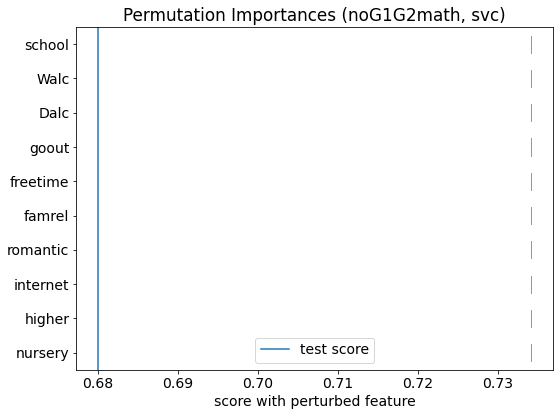

In [241]:
sorted_indcs = np.argsort(np.mean(scores,axis=1))[:10][::-1] #order features by how important they are - by how much accuracy score has reduced 
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(8,6))
plt.boxplot(scores[sorted_indcs].T,labels=ftr_names[sorted_indcs],vert=False)
plt.axvline(mean_test_scores,label='test score') #original test score
plt.title("Permutation Importances (noG1G2math, svc)")
plt.xlabel('score with perturbed feature')
plt.legend()
plt.tight_layout()
path = '/Users/anniephan/Desktop/Data_Science_Master/DATA_1030/data1030_project/figures/noG1G2math/svc/'
plt.savefig(path + 'svc_perturb.png')
plt.show()

## 3bii. SHAP

In [59]:
# load saved data
import pickle
fname = '../results/noG1G2math/svc/noG1G2math_svc_bestmodel_score'+'.save'
file = open(fname, 'rb')
grid, X_test, y_test = pickle.load(file)
file.close()

In [60]:
import shap
shap.initjs() # required for visualizations later on
# transform the test set
X_test_transformed = grid.best_estimator_[0].transform(X_test)
# create the explainer
explainer = shap.KernelExplainer(grid.best_estimator_[1].predict, X_test_transformed[:10])
print(np.shape(X_test_transformed))
#calculate shap values
shap_values = explainer.shap_values(X_test_transformed[:10])
print(np.shape(shap_values))

(79, 45)



(10, 45)


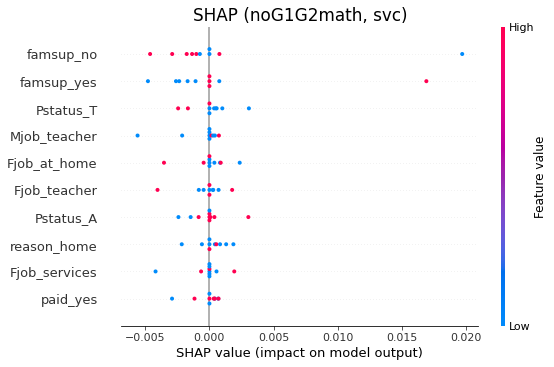

In [61]:
import shap
shap.initjs
shap.summary_plot(shap_values, X_test_transformed[:10], feature_names=feature_names, max_display=10, show=False)
plt.title("SHAP (noG1G2math, svc)")
path = '/Users/anniephan/Desktop/Data_Science_Master/DATA_1030/data1030_project/figures/noG1G2math/svc/'
plt.savefig(path + 'svc_shap.png',bbox_inches='tight')
plt.show()

In [251]:
index = 0 # the index of the point to explain
print(explainer.expected_value) # we explain user 0 predictions
shap.force_plot(explainer.expected_value, shap_values[index,:], 
                features = X_test_transformed[index,:],feature_names = feature_names)

0.9999999999999997


In [252]:
index = 25 # the index of the point to explain
print(explainer.expected_value) # we explain user 0 predictions
shap.force_plot(explainer.expected_value, shap_values[index,:], 
                features = X_test_transformed[index,:],feature_names = feature_names)

0.9999999999999997


In [253]:
index = 50 # the index of the point to explain
print(explainer.expected_value) # we explain user 0 predictions
shap.force_plot(explainer.expected_value, shap_values[index,:], 
                features = X_test_transformed[index,:],feature_names = feature_names)

0.9999999999999997


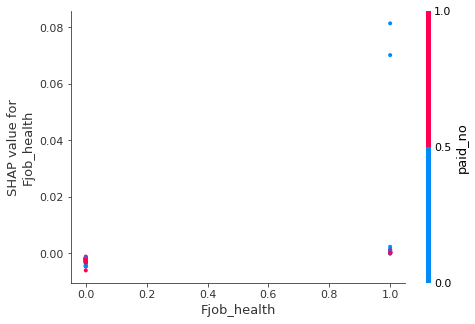

In [254]:
ftr = 'Fjob_health'
shap.dependence_plot(ftr, shap_values, X_test_transformed, feature_names=feature_names)

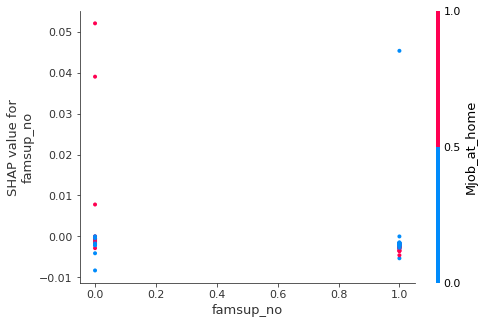

In [255]:
ftr = 'famsup_no'
shap.dependence_plot(ftr, shap_values, X_test_transformed, feature_names=feature_names)

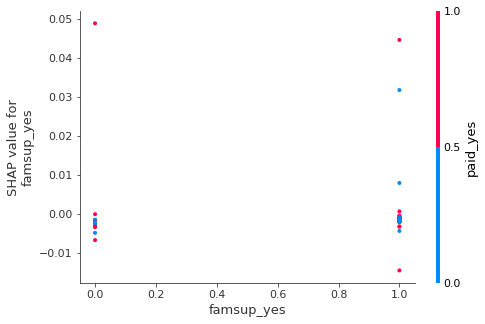

In [256]:
ftr = 'famsup_yes'
shap.dependence_plot(ftr, shap_values, X_test_transformed, feature_names=feature_names)

## 3c. CONFUSION MATRIX

In [257]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = np.array(classes)
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [258]:
# load saved data
import pickle
fname = '../results/noG1G2math/svc/noG1G2math_svc_bestmodel_score'+'.save'
file = open(fname, 'rb')
grid, X_test, y_test = pickle.load(file)
file.close()

confusion matrix : [[ 0 19]
 [ 0 60]]


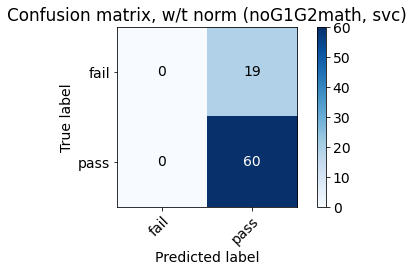

normalized confusion matrix : [[0. 1.]
 [0. 1.]]


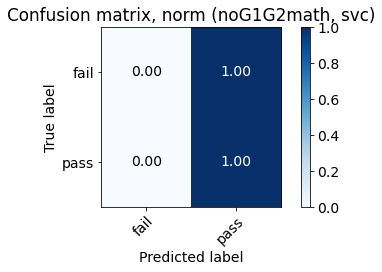

In [259]:
y_pred = grid.best_estimator_.predict(X_test)
#not-normalized
conf_mat = confusion_matrix(y_test, y_pred)
print("confusion matrix :", conf_mat)
plot_confusion_matrix(y_test,y_pred,classes=['fail','pass'])
plt.title('Confusion matrix, w/t norm (noG1G2math, svc)')
path = '/Users/anniephan/Desktop/Data_Science_Master/DATA_1030/data1030_project/figures/noG1G2math/svc/'
plt.savefig(path + 'svc_cm.png')
plt.show()

#normalized
norm_conf_mat = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]
print("normalized confusion matrix :",norm_conf_mat)
plot_confusion_matrix(y_test,y_pred,classes=['fail','pass'],normalize= True )
plt.title('Confusion matrix, norm (noG1G2math, svc)')
path = '/Users/anniephan/Desktop/Data_Science_Master/DATA_1030/data1030_project/figures/noG1G2math/svc/'
plt.savefig(path + 'svc_cmnorm.png')
plt.show()

# PART C: SUMMARY

In [277]:
# load saved data
import pickle
fname = '../results/noG1G2math/logreg/noG1G2math_logreg_model_mean_std'+'.save'
file = open(fname, 'rb')
mean_test_scores, std_test_scores, model_mean, model_std = pickle.load(file)
file.close()

In [278]:
# load saved data
import pickle
fname = '../results/noG1G2math/rf/noG1G2math_rf_model_mean_std'+'.save'
file = open(fname, 'rb')
mean_test_scores, std_test_scores, model_mean, model_std = pickle.load(file)
file.close()

In [45]:
# load saved data
import pickle
fname = '../results/noG1G2math/svc/noG1G2math_svc_model_mean_std'+'.save'
file = open(fname, 'rb')
mean_test_scores, std_test_scores, model_mean, model_std = pickle.load(file)
file.close()

In [49]:
print(model_mean)
print(model_std)

[0.67, 0.675, 0.68]
[0.062, 0.57, 0.055]


In [50]:
# save the output so I can use it later
fname = '../results/noG1G2math/noG1G2math_model_mean_std'+'.save'
file = open(fname, 'wb')
pickle.dump((model_mean, model_std), file)
file.close()

In [51]:
ML_models = ["logreg", 'rf', 'svc']

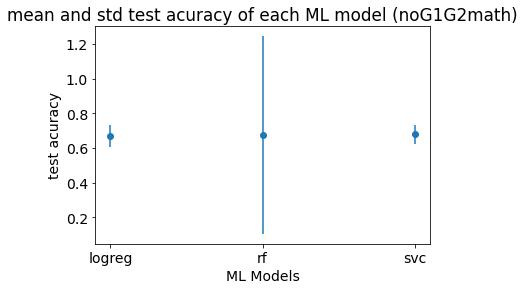

In [53]:
plt.errorbar(ML_models ,model_mean, yerr = model_std, fmt="o")
plt.xlabel("ML Models")
plt.ylabel("test acuracy")
plt.title("mean and std test acuracy of each ML model (noG1G2math)")
path = '/Users/anniephan/Desktop/Data_Science_Master/DATA_1030/data1030_project/figures/noG1G2math/'
plt.savefig(path + 'noG1G2math_model_mean_std.png', bbox_inches='tight')

In [284]:
baseline = np.sum(y == 1)/len(y)
baseline 

0.6708860759493671

In [285]:
std_above_baseline = []
for i in range(3):
    std_abv_bsl = np.around(((model_mean[i] - baseline)/model_std[i]),3)
    std_above_baseline.append(std_abv_bsl)
std_above_baseline

[-0.014, 0.072, 0.166]

In [286]:
results = pd.DataFrame(ML_models)
results.rename(columns = {0:'ML_models'}, inplace = True) 
results["Mean_noG1G2math"] = model_mean
results["Std_noG1G2math"] = model_std
results["Std_abv_bsl_noG1G21math"] = std_above_baseline
results

,ML_models,Mean_noG1G2math,Std_noG1G2math,Std_abv_bsl_noG1G21math
0,logreg,0.670,0.062,-0.014
1,rf,0.675,0.057,0.072
2,svc,0.680,0.055,0.166


In [298]:
print("best params for ML models:", best_params)

best params for ML models: [{'logisticregression__C': 0.01}, {'randomforestclassifier__max_depth': 11, 'randomforestclassifier__max_features': 0.5, 'randomforestclassifier__min_samples_split': 2}, {'svc__C': 100, 'svc__gamma': 1}]
